## 长短时神经网络——Regression example

In [1]:
import numpy as np
import pandas as pd
from frames import tools

In [2]:
# 导入股票数据集
stock_file = './dataset/stock_2.csv'
stock = pd.read_csv(stock_file)

In [3]:
stock.head(5)

,index_code,date,open,close,low,high,volume,money,change,label
0,sh000001,1990/12/20,104.30,104.39,99.98,104.39,197000.0,85000.0,0.044109,109.13
1,sh000001,1990/12/21,109.07,109.13,103.73,109.13,28000.0,16100.0,0.045407,114.55
2,sh000001,1990/12/24,113.57,114.55,109.13,114.55,32000.0,31100.0,0.049666,120.25
3,sh000001,1990/12/25,120.09,120.25,114.55,120.25,15000.0,6500.0,0.049760,125.27
4,sh000001,1990/12/26,125.27,125.27,120.25,125.27,100000.0,53700.0,0.041746,125.28


In [4]:
label = stock['label']

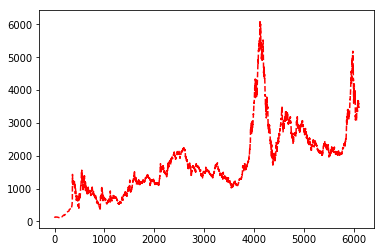

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(len(label)), label, 'r--')
plt.show()

In [6]:
dataset = stock.values[:, 2:]
dataset.shape

(6109, 8)

In [7]:
# 转换类型，数据集太多了，切割部分
dataset = dataset[-1000:, :]
print(dataset.shape)
dataset = dataset.astype(np.float32)
dataset.dtype

(1000, 8)


dtype('float32')

In [8]:
# 标准化
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(dataset)
dataset = standard.transform(dataset)
dataset.shape

(1000, 8)

### 调用 tools 里面的 create_dataset 函数，构造适应的数据集，look_back 默认为 7，即 (x-7) 天预测第 x 天

In [9]:
from frames.tools import create_dataset

data_X, data_y = tools.create_dataset(dataset, look_back=2)

In [10]:
print(data_X.shape)
print(data_y.shape)

(998, 2, 8)
(998, 1)


In [11]:
# 划分训练集和测试集，80% 作为训练集
train_size = int(len(data_X) * 0.8)
test_size = len(data_X) - train_size

train_X = data_X[:train_size]
train_y = data_y[:train_size]

test_X = data_X[train_size:]
test_y = data_y[train_size:]

In [12]:
print(train_X.shape)
print(train_y.shape)

(798, 2, 8)
(798, 1)


### 调用 DeeplearningRegression 里面的 LSTM 框架

In [20]:
from frames.DeeplearningRegression import LSTM

'''
参数说明：
hidden_layers: 隐藏层神经元个数，传入 int
num_layers: lstm 层数，传入 int
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128
'''
lstm = LSTM(learning_rate=[1e-2, 1e-4, 1e-6], num_layers=2, dropout=0.5, hidden_size=32, epoch=2000, batch_size=256) # 采用梯度衰减策略

In [21]:
lstm.fit(train_X, train_y)

Training... epoch: 100, loss: 0.011380515992641449
Training... epoch: 200, loss: 0.009816461242735386
Training... epoch: 300, loss: 0.012153432704508305
Training... epoch: 400, loss: 0.010820575058460236
Training... epoch: 500, loss: 0.004534476436674595
Training... epoch: 600, loss: 0.028697246685624123
Training... epoch: 700, loss: 0.013054010458290577
Training... epoch: 800, loss: 0.006312083452939987
Training... epoch: 900, loss: 0.019694585353136063
Training... epoch: 1000, loss: 0.028333427384495735
Training... epoch: 1100, loss: 0.021657852455973625
Training... epoch: 1200, loss: 0.00555123295634985
Training... epoch: 1300, loss: 0.010831777937710285
Training... epoch: 1400, loss: 0.011384489014744759
Training... epoch: 1500, loss: 0.005120395217090845
Training... epoch: 1600, loss: 0.023732971400022507
Training... epoch: 1700, loss: 0.02195873111486435
Training... epoch: 1800, loss: 0.007774232886731625
Training... epoch: 1900, loss: 0.007784031331539154
Training... epoch: 2000

### 调用 score 得到结果，调用 predict 得到值

In [22]:
lstm.score(test_X, test_y)

mse: 1.029679298400879, rmse: 1.0147311687469482, mae: 0.7572418451309204, r2: -0.7163814546970078


### 调用 result_plot 保存结果图

In [23]:
import os

save_path = './Example_save_resultes/save_pngs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
save_png = os.path.join(save_path, 'lstm_picture.png')
lstm.result_plot(test_X, test_y, save_file=save_png)

Save the picture successfully!


### 保存模型结果, 这里有两个参数，统计 dataset 是否使用了 标准化 和 pca 的预处理

In [24]:
results_file = './Example_save_resultes/lstm_result.csv'
lstm.save_result(results_file, is_standard=False, is_PCA=False)

Save results success!


### 调用 loss_plot 查看训练过程， loss 的变化

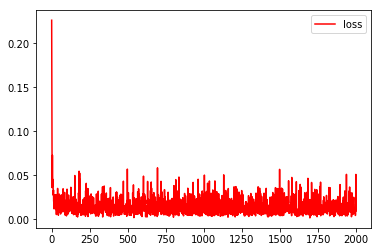

In [25]:
lstm.loss_plot()